In [12]:
library(stats)
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(insol)
library(ggbeeswarm)
library(gridExtra)
library(viridis)
library(RColorBrewer)
library(gganimate)

In [2]:
df <- fread("GlobalLandTemperaturesByCity.csv",showProgress =  FALSE)

In [3]:
# Subset to Moscow
df <- df[City=="Moscow"]

# Remove the missing values
df <- na.omit(df)

# Format the date field
df <- df[,dt:=as.Date(dt,"%Y-%m-%d")]

# Format Lattitude and Longitude to numeric values
df$lat<-as.numeric(gsub("N|E|S|W", "",df$Latitude))*
  ifelse(grepl("S",df$Latitude),-1,1)

df$long<-as.numeric(gsub("N|E|S|W", "",df$Longitude))*
  ifelse(grepl("W",df$Longitude),-1,1)

# Create numeric/string month/year 
df$Month<-as.numeric(format(df$dt,"%m"))
df$Month.String<-format(df$dt,"%B")
df$Year<-as.numeric(format(df$dt,"%Y"))



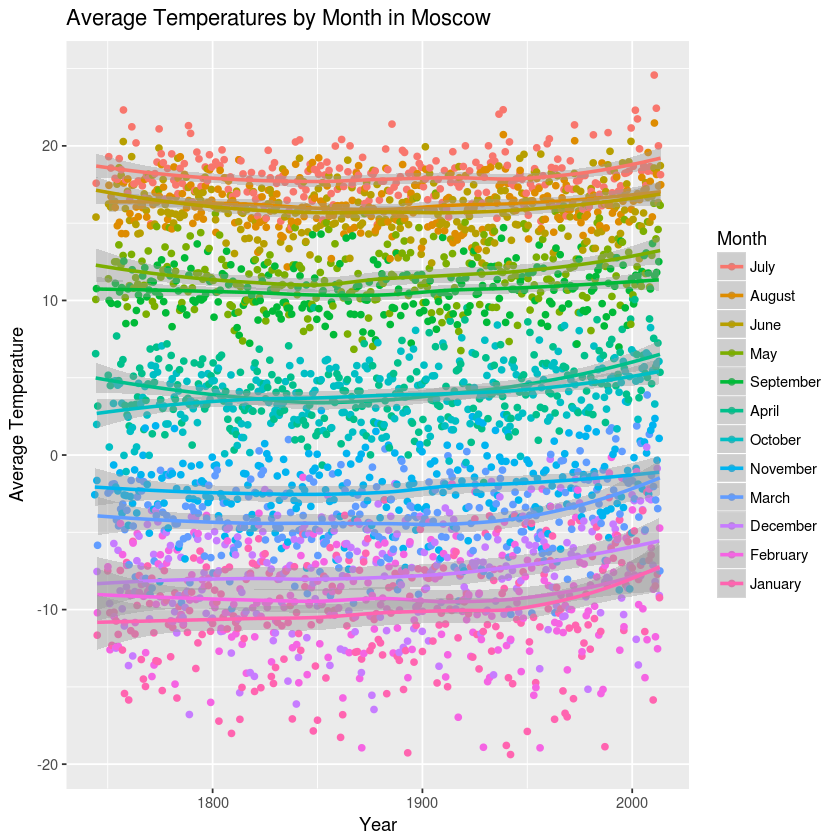

In [4]:
ggplot(df,aes(x=dt,y=AverageTemperature,colour=reorder(Month.String,-AverageTemperature,mean)))+
  geom_point()+
  geom_smooth(method="loess")+
  labs(title="Average Temperatures by Month in Moscow",
       x="Year",
       y="Average Temperature",
       colour="Month")

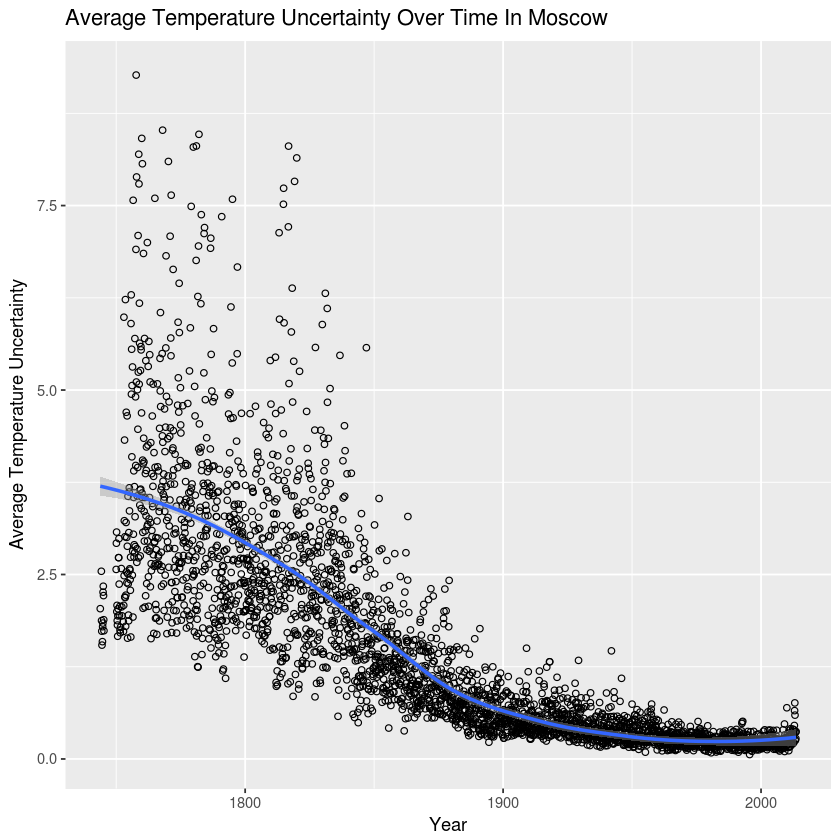

In [5]:
ggplot(df,aes(x=dt,y=AverageTemperatureUncertainty))+
  geom_point(shape=1)+
  geom_smooth(method="loess")+
  labs(title="Average Temperature Uncertainty Over Time In Moscow",
       x="Year",
       y="Average Temperature Uncertainty")

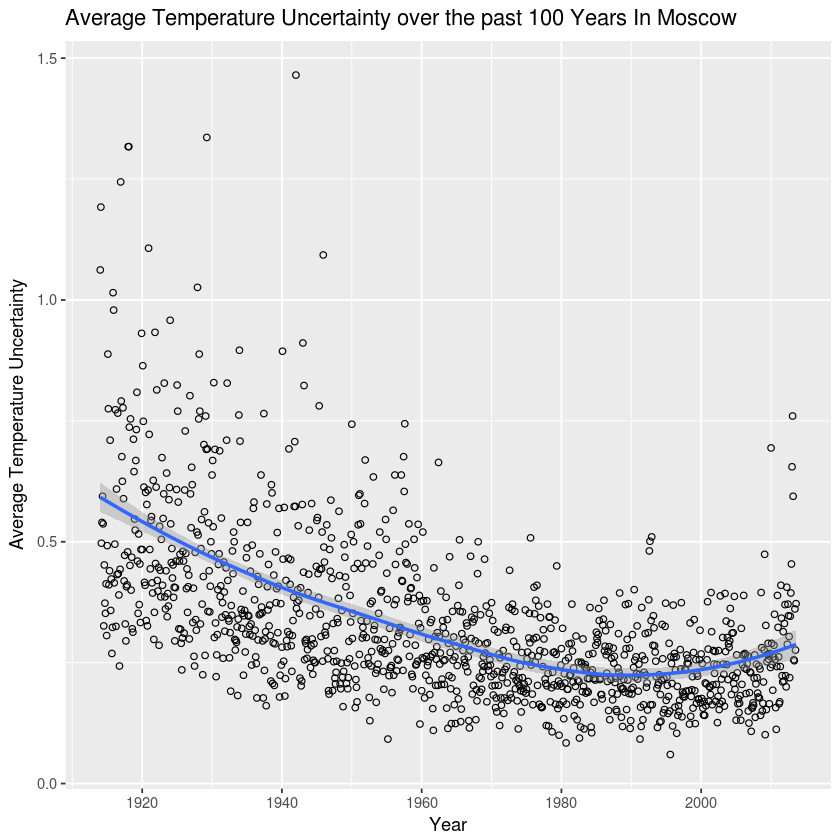

In [6]:
ggplot(df[Year>1913,],aes(x=dt,y=AverageTemperatureUncertainty))+
  geom_point(shape=1)+
  geom_smooth(method="loess")+
  ggtitle("Average Temperature Uncertainty over the past 100 Years In Moscow")+
  xlab("Year")+
  ylab("Average Temperature Uncertainty")

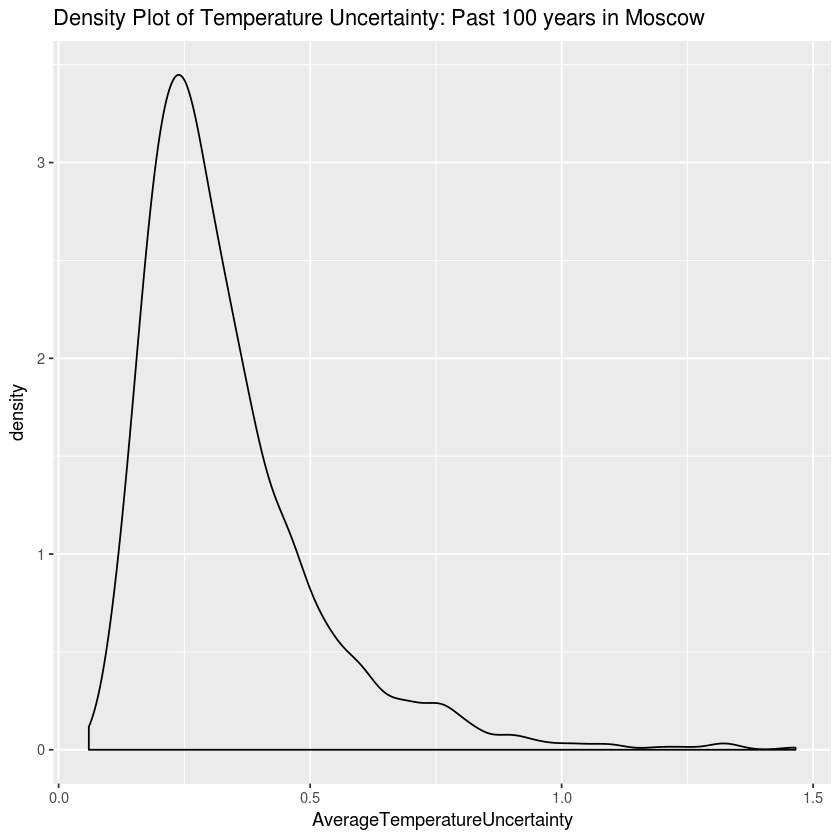

In [7]:
ggplot(df[Year>1913,], aes(x=AverageTemperatureUncertainty)) + 
  geom_density()+
  labs(title="Density Plot of Temperature Uncertainty: Past 100 years in Moscow")

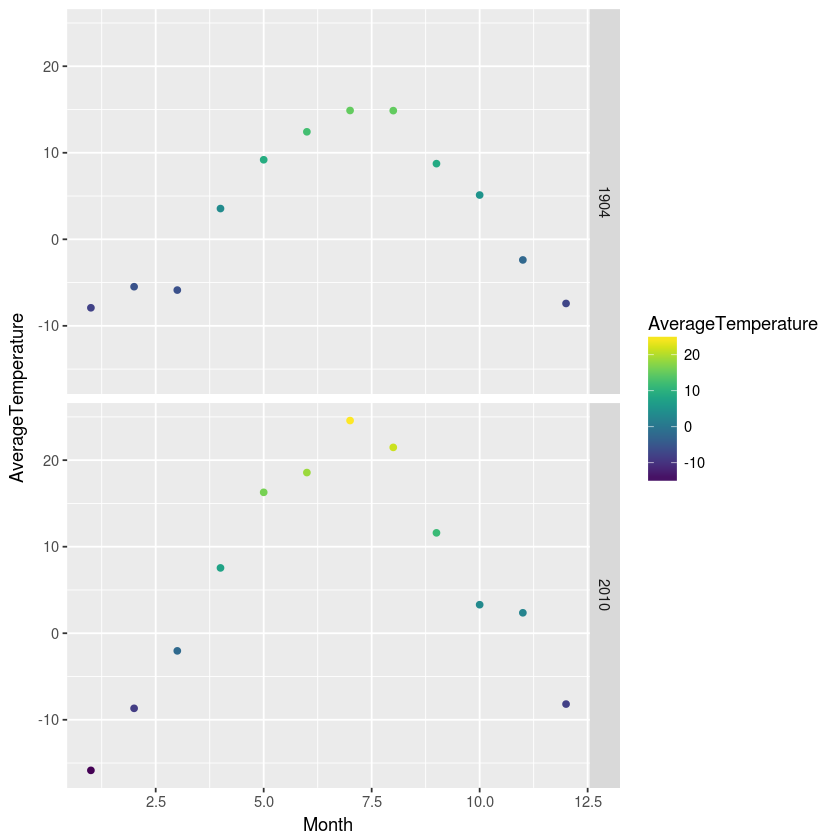

In [8]:
df %>% filter(Year==1904 | Year==2010) %>% ggplot(aes(AverageTemperature,Month,color=AverageTemperature)) + 
geom_quasirandom() + scale_colour_viridis() + facet_grid(Year ~.) + coord_flip()

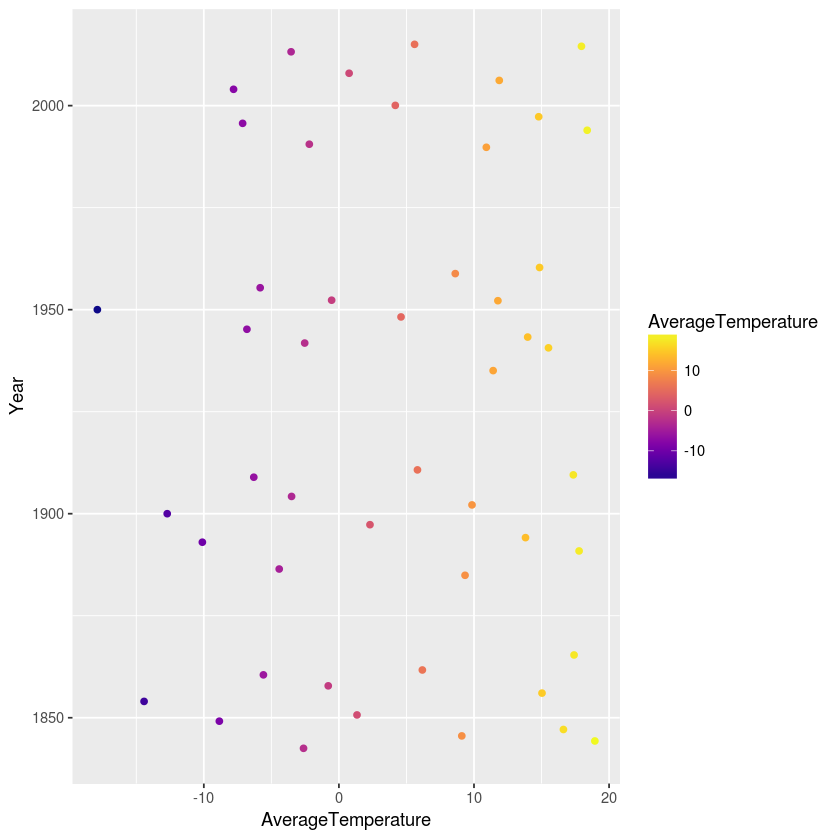

In [9]:
df %>% filter( Year==1854 | Year==1900 | Year==1950 | Year==2004) %>% ggplot(aes(AverageTemperature,Year,color=AverageTemperature)) + 
  geom_quasirandom() + scale_colour_viridis(option = "C")

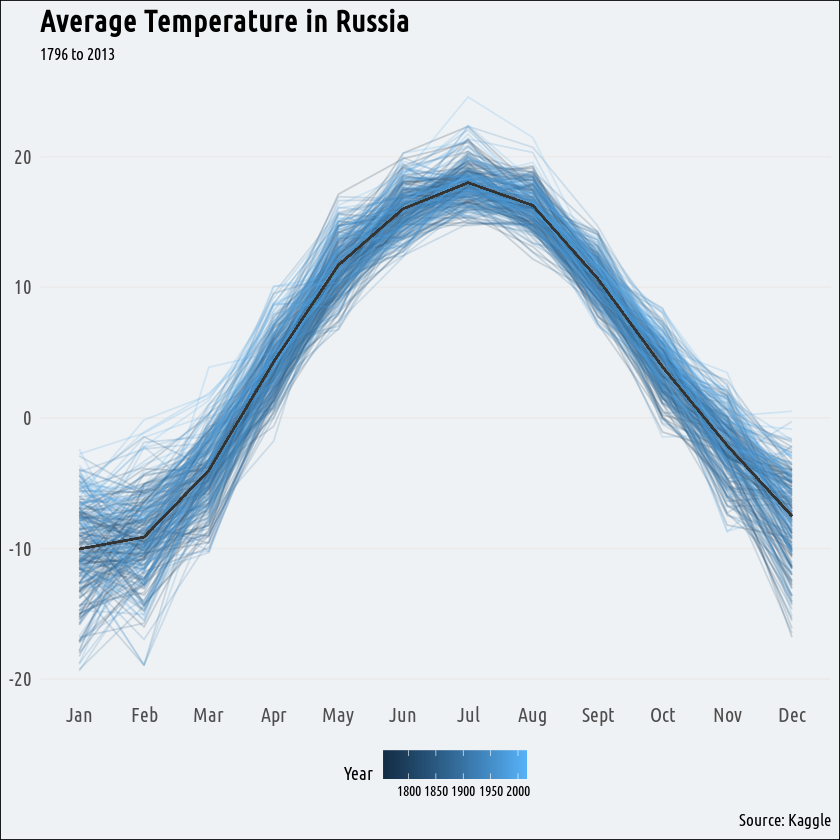

In [10]:
Russia <- df %>% filter(Country=="Russia")

Russia$dt <-as.Date(Russia$dt)
Russia$Year <- format(Russia$dt,"%Y")
Russia$Month <- format(Russia$dt,"%m")

Russia %>% filter(!is.na(AverageTemperature))  %>% 
  group_by(Year) %>% mutate(no_of_cases= length(Year)) %>% group_by(Month) %>% mutate(avg_tempMonth= mean(AverageTemperature)) %>%
  filter(no_of_cases==12) %>% 
  ggplot(aes(Month,AverageTemperature,group=Year,color =as.numeric(Year))) + geom_line(alpha= 0.2) + 
  geom_line(aes(Month,avg_tempMonth),color= "grey20",alpha = 0.4) +
  theme_minimal(base_family = "Ubuntu Condensed")+
  scale_x_discrete(labels=c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"))+labs(color="Year") +
  theme(legend.position = "bottom",axis.title = element_blank(),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        panel.grid.minor.y = element_blank(),
        plot.background = element_rect(fill = "#EFF2F4"),
        axis.text = element_text(size = 12),
        plot.title = element_text(size=18,face = "bold")) + 
  ggtitle("Average Temperature in Russia",subtitle = "1796 to 2013 ") + labs(caption= "Source: Kaggle")

In [11]:
# Uncomment to create gif

# p<-
#   Russia %>% filter(!is.na(AverageTemperature))  %>% 
#   filter(Year > 1850) %>%
#   group_by(Year) %>% mutate(no_of_cases= length(Year)) %>% 
#   group_by(Month) %>% 
#   mutate(avg_tempMonth= mean(AverageTemperature)) %>%
#   filter(no_of_cases==12) %>% 
#   ggplot(aes(Month,AverageTemperature,group=Year,cumulative = TRUE,alpha=Year,label=Year,frame=Year)) +
#   geom_line(color="grey20") + 
#   geom_line(aes(Month,avg_tempMonth,frame= 2013 + as.numeric(Month) , group=1),size= 2.3,color= "dodgerblue3") +
#   geom_text(aes(x=06,y=20,cumulative=FALSE),size=30,color="grey20") + 
#   theme_minimal(base_family = "Ubuntu Condensed")+
#   scale_x_discrete(labels=c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"))+
#   theme(legend.position = "none",axis.title = element_blank(),
#         panel.grid.major.x = element_blank(),
#         panel.grid.minor.x = element_blank(),
#         panel.grid.minor.y = element_blank(),
#         plot.background = element_rect(fill = "#EFF2F4"),
#         axis.text = element_text(size = 12),
#         plot.title = element_text(size=18,face = "bold")) + 
#   ggtitle("Average Temperature in Russia",subtitle = "1850 to 2013") + 
# labs(caption= "Source: Kaggle") 


# gganimate(p,"Output.gif",ani.width=810, ani.height=520, interval=0.1,title_frame = F)